# Lab 2 - Building and Visualizing Neural Networks
## COSC 4337 - Data Science II
***

### 1) Introduction

In this lab, we will build a simple neural network to solve a non-linear classification problem. The key learning objective is to understand how a neural network can learn complex patterns and to visualize its **decision boundary**.

A decision boundary is a line or surface that separates the different classes predicted by a model. Visualizing it helps us understand *how* the model is making its decisions.

This lab is divided into two parts, allowing you to complete the task in either **TensorFlow/Keras** or **PyTorch**.

#### Dataset: Moons
We will use the `make_moons` dataset from `scikit-learn`. This dataset generates two interleaving half-moon shapes, which cannot be separated by a simple straight line. It's a classic problem for testing a model's ability to learn non-linear relationships. The data has two features (X and Y coordinates) and a binary target (which moon the point belongs to).

### 2) Setup and Data Generation
***
**NOTE**: Required actions you need to perform are marked with `***`.

#### 2.1) Initial Imports
***
*** Begin by importing the necessary packages.

In [1]:
%pip install torch tensorflow
# General imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow import keras

# PyTorch imports
import torch
from torch import nn
from torch import optim

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 13.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.4 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.9 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 22.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### 2.2) Generate and Visualize Data
***
*** Generate 1,000 data points using `make_moons`, adding some noise to make the problem more realistic. Then, create a scatter plot to visualize the data.

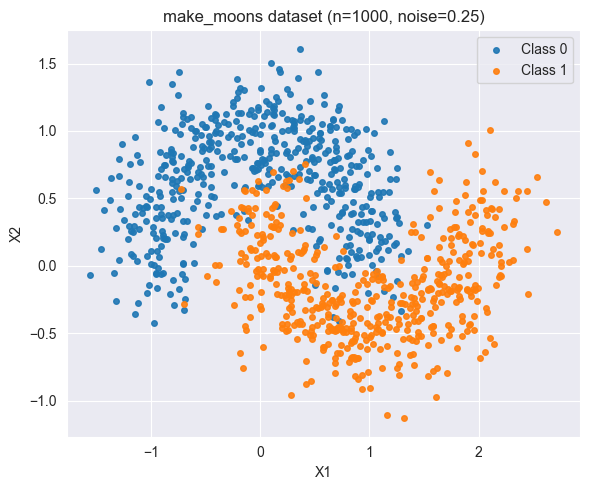

In [3]:
# *** YOUR CODE HERE ***
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)

# Generate the dataset
df = pd.DataFrame(X, columns=["x1", "x2"])
df["y"] = y

# Create a scatter plot of the data, colored by the target variable 'y'
plt.figure(figsize=(6,5))
plt.scatter(df.loc[df.y==0, "x1"], df.loc[df.y==0, "x2"], s=16, alpha=0.9, label="Class 0")
plt.scatter(df.loc[df.y==1, "x1"], df.loc[df.y==1, "x2"], s=16, alpha=0.9, label="Class 1")
plt.title("make_moons dataset (n=1000, noise=0.25)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.tight_layout()
plt.show()

#### 2.3) Train-Test Split
***
*** Split the data into training and testing sets. We will use 20% of the data for testing.

In [4]:
# *** YOUR CODE HERE ***
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (800, 2)
Testing data shape: (200, 2)


--- 
# Part 1: TensorFlow & Keras Implementation

### 3.1) Build the Model (Keras)

We will build a simple `Sequential` model. Since the data is not linearly separable, we need at least one hidden layer with a non-linear activation function like `relu`.

Our model will have:
1. An input layer (implicitly defined by the first `Dense` layer).
2. A hidden layer with 10 neurons and `'relu'` activation.
3. An output layer with 1 neuron and a `'sigmoid'` activation (since this is a binary classification problem).

***
*** Define and summarize the Keras model.

In [5]:
# *** YOUR CODE HERE ***

# Define the model
model = keras.Sequential([
    keras.layers.Dense(10, activation="relu", input_shape=(2,)),
    keras.layers.Dense(1, activation="sigmoid")
])

# Display the model's architecture
model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

### 3.2) Compile the Model (Keras)
***
*** Compile the model with the `adam` optimizer, `binary_crossentropy` loss, and `accuracy` as the metric.

In [6]:
# *** YOUR CODE HERE ***
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

### 3.3) Train the Model (Keras)
***
*** Train the model on the training data for 100 epochs. Set `verbose=0` to keep the output clean.

In [7]:
# *** YOUR CODE HERE ***
history = model.fit(X_train, y_train, epochs=100, verbose=0)

print("Training finished.")

Training finished.


### 3.4) Evaluate the Model (Keras)
***
*** Evaluate the trained model on the test data and print the test loss and accuracy.

In [8]:
# *** YOUR CODE HERE ***
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

Test Loss: 0.2121

Test Accuracy: 93.00%


### 3.5) Visualize the Decision Boundary (Keras)

This helper function will create a mesh grid, predict the class for each point on the grid, and plot the resulting decision boundary.

***
*** Use the provided function to plot the decision boundary for your Keras model.

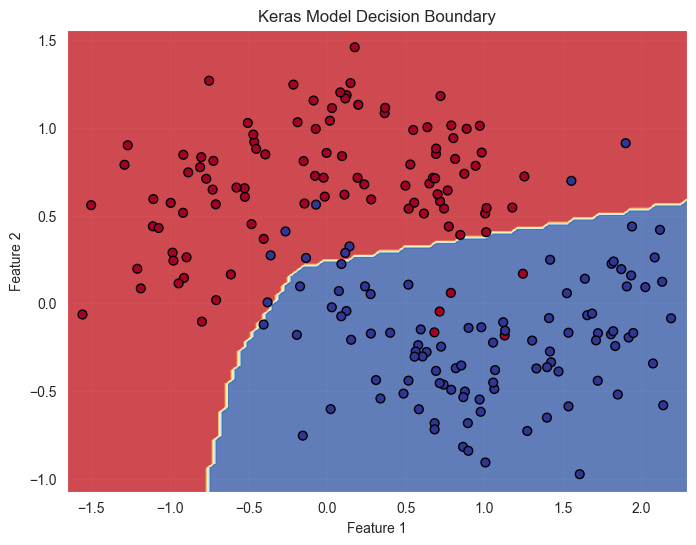

In [9]:
def plot_decision_boundary_keras(model, X, y):
    """Plots the decision boundary for a Keras model."""
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Predict classes for the mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points, verbose=0)
    Z = (Z > 0.5).astype(int) # Convert probabilities to binary class labels
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Keras Model Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# *** YOUR CODE HERE ***
# Plot the decision boundary for the test data
plot_decision_boundary_keras(model, X_test, y_test)

### 3.6) Experiment: A Deeper Model (Keras)

What happens if we make the model more complex by adding more hidden layers? A more complex model has a higher *capacity* to learn intricate patterns. Let's build a new model with three hidden layers.

***
*** Build, train, and visualize a deeper Keras model.

Deeper Model Test Accuracy: 97.50%


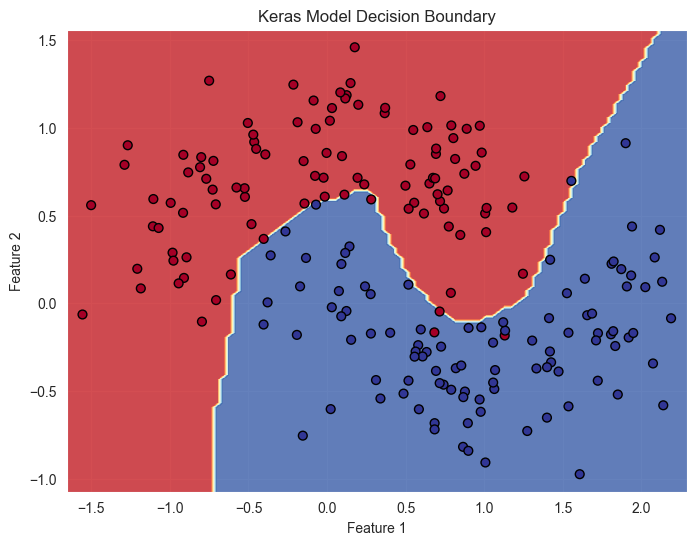

In [10]:
# *** YOUR CODE HERE ***

# 1. Define the deeper model
model_keras_deep = keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(2,)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_keras_deep.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# 3. Fit the model
model_keras_deep.fit(X_train, y_train, epochs=100, verbose=0)

# 4. Evaluate and visualize
loss, acc = model_keras_deep.evaluate(X_test, y_test, verbose=0)
print(f"Deeper Model Test Accuracy: {acc * 100:.2f}%")

# 5. Plot the decision boundary for the deeper model
plot_decision_boundary_keras(model_keras_deep, X_test, y_test)

***
*** **Question:** Compare the decision boundary of the simple model with the new, deeper model. Is the new boundary smoother or more complex? Does it seem to fit the noisy points more closely? What might this imply about overfitting?

The new boundary seems to be smoother than the simple model based on what we see in the two mesh grids. The new boundary seems to be fitting noisy points more closely to the zone and although they seem to be smooth they are also pretty close to each other to where there's not a crazy difference between the simple model and the deeper model.

--- 
# Part 2: PyTorch Implementation

### 4.1) Data Preparation (PyTorch)

PyTorch works with its own `Tensor` objects. We need to convert our NumPy arrays (`X_train`, `X_test`, etc.) into PyTorch tensors.

***
*** Convert the training and testing data into PyTorch tensors.

In [11]:
# *** YOUR CODE HERE ***

# Convert NumPy arrays to PyTorch Tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32)
y_test_t  = torch.tensor(y_test,  dtype=torch.float32).unsqueeze(1)

# View the first 5 samples
print(X_train_t[:5])
print(y_train_t[:5])

tensor([[ 0.1872, -0.2122],
        [ 0.4500,  0.7037],
        [ 2.2355,  0.2889],
        [-0.7384, -0.1687],
        [ 1.9279, -0.2263]])
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]])


### 4.2) Build the Model (PyTorch)

In PyTorch, models are typically defined as a class that inherits from `nn.Module`. We will create a class `MoonModel` with the same architecture as our Keras model.

***
*** Define the PyTorch model class.

In [12]:
# *** YOUR CODE HERE ***

class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the layers of the neural network
        self.fc1 = nn.Linear(2, 10)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)
        self.out = nn.Sigmoid()



    def forward(self, x):
        # Define the forward pass
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.out(x)
        return x


# Instantiate the model
model_torch = MoonModel()
print(model_torch)

MoonModel(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
  (out): Sigmoid()
)


### 4.3) Define Loss and Optimizer (PyTorch)
***
*** Define the loss function (`BCELoss` for binary cross-entropy) and the `Adam` optimizer.

In [13]:
# *** YOUR CODE HERE ***

# Loss function
criterion = nn.BCELoss()

# Optimizer
optimizer = optim.Adam(model_torch.parameters(), lr=0.01)


### 4.4) Train the Model (PyTorch)

Training in PyTorch requires writing a manual loop. For each epoch, we perform a forward pass, calculate the loss, perform backpropagation, and update the weights.

***
*** Write the training loop to train the model for 100 epochs.

In [15]:
# *** YOUR CODE HERE ***
epochs = 100
model_torch.train()

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model_torch(X_train_t)
    loss = criterion(y_pred, y_train_t)
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch + 1} | Loss: {loss.item():.4f}")

Epoch: 10 | Loss: 0.5728
Epoch: 20 | Loss: 0.5029
Epoch: 30 | Loss: 0.4371
Epoch: 40 | Loss: 0.3919
Epoch: 50 | Loss: 0.3652
Epoch: 60 | Loss: 0.3471
Epoch: 70 | Loss: 0.3349
Epoch: 80 | Loss: 0.3272
Epoch: 90 | Loss: 0.3215
Epoch: 100 | Loss: 0.3162


### 4.5) Evaluate the Model (PyTorch)

To evaluate, we put the model in `evaluation` mode and make predictions on the test data. We use `torch.no_grad()` to ensure no gradients are calculated, which saves computation.

***
*** Evaluate your trained PyTorch model on the test data and calculate its accuracy.

In [16]:
# *** YOUR CODE HERE ***
model_torch.eval()
with torch.no_grad():
    y_prob = model_torch(X_test_t)
    y_pred = (y_prob >= 0.5).float()
    acc = (y_pred.eq(y_test_t).float().mean().item())
    print(f"Test Accuracy: {acc * 100:.2f}%")

Test Accuracy: 92.00%


### 4.6) Visualize the Decision Boundary (PyTorch)
***
*** Use the provided helper function to plot the decision boundary for your PyTorch model.

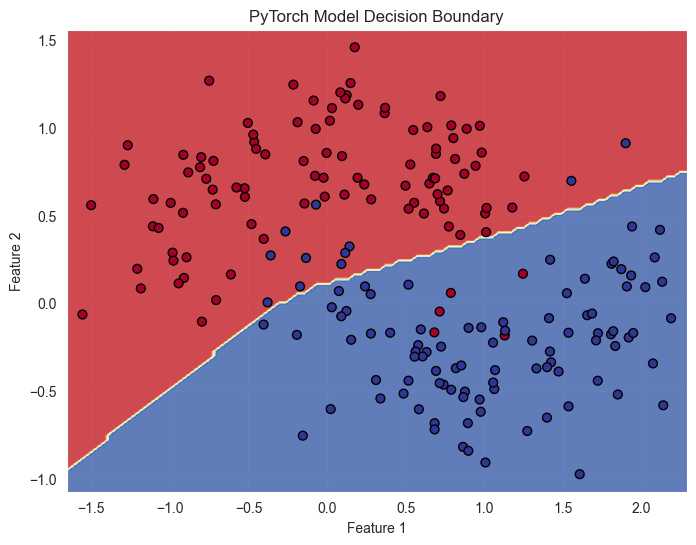

In [17]:
def plot_decision_boundary_pytorch(model, X, y):
    """Plots the decision boundary for a PyTorch model."""
    # Convert to NumPy for plotting if they are tensors
    if isinstance(X, torch.Tensor):
        X = X.numpy()
    if isinstance(y, torch.Tensor):
        y = y.numpy()

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict classes for the mesh grid
    grid_points = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    model.eval()
    with torch.no_grad():
        Z = model(grid_points)
    Z = torch.round(Z).numpy().reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("PyTorch Model Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# *** YOUR CODE HERE ***
# Plot the decision boundary for the test data
plot_decision_boundary_pytorch(model_torch, X_test_t, y_test_t)

### 4.7) Experiment: A Deeper Model (PyTorch)

Let's see how a more complex PyTorch model affects the decision boundary. 

***
*** Build, train, and visualize a deeper PyTorch model with three hidden layers.

Epoch: 10 | Loss: 0.4364
Epoch: 20 | Loss: 0.2836
Epoch: 30 | Loss: 0.2107
Epoch: 40 | Loss: 0.1579
Epoch: 50 | Loss: 0.1409
Epoch: 60 | Loss: 0.1369
Epoch: 70 | Loss: 0.1350
Epoch: 80 | Loss: 0.1323
Epoch: 90 | Loss: 0.1310
Epoch: 100 | Loss: 0.1303
Deeper PyTorch Model Test Accuracy: 98.00%
Visualizing the deeper PyTorch model decision boundary:


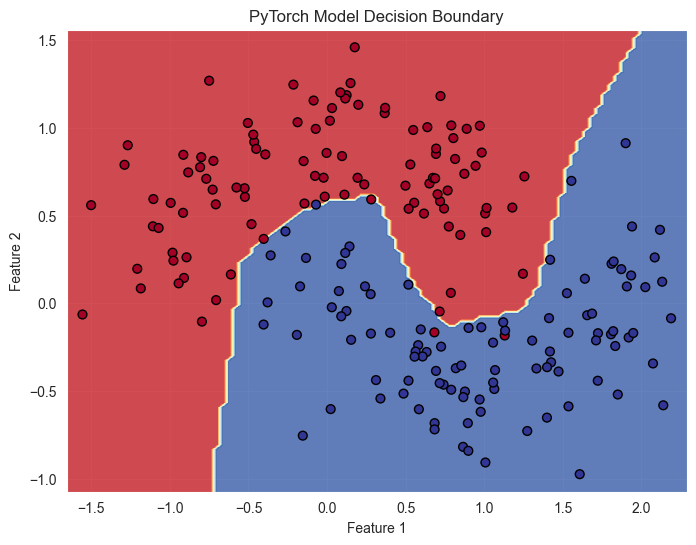

In [18]:
class MoonModelDeep(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.act = nn.ReLU()
        self.out = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.act(self.fc3(x))
        x = self.out(self.fc4(x))
        return x

model_torch_deep = MoonModelDeep()
criterion_deep = nn.BCELoss()
optimizer_deep = optim.Adam(model_torch_deep.parameters(), lr=0.01)

epochs = 100
model_torch_deep.train()
for epoch in range(epochs):
    optimizer_deep.zero_grad()
    y_pred = model_torch_deep(X_train_t)
    loss = criterion_deep(y_pred, y_train_t)
    loss.backward()
    optimizer_deep.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch + 1} | Loss: {loss.item():.4f}")

model_torch_deep.eval()
with torch.no_grad():
    y_prob = model_torch_deep(X_test_t)
    y_pred = (y_prob >= 0.5).float()
    acc = (y_pred.eq(y_test_t).float().mean().item())
    print(f"Deeper PyTorch Model Test Accuracy: {acc * 100:.2f}%")

print("Visualizing the deeper PyTorch model decision boundary:")
plot_decision_boundary_pytorch(model_torch_deep, X_test_t, y_test_t)


***
*** **Question:** Compare the decision boundary of the simple PyTorch model with the new, deeper model. How did it change? What does this suggest about the model's ability to fit the data?

Based on the two decision boundary of both the simple PyTorch model with the new and deeper model I came to notice a difference in the border of the boundary for class 0 and 1. For the new one it seems to be lienar while for the deeper one its fluctuating. The deeper model however has points closer to the border than compared to the new one. Similarities between both is that points are quite nearby to each other.

### 5) Conclusion

In this lab, you successfully built, trained, and evaluated a neural network for a classification task in both TensorFlow/Keras and PyTorch. You also learned how to visualize a model's decision boundary and explored how model complexity can change this boundary, providing a powerful way to understand model behavior. This forms a foundational understanding for tackling more complex deep learning problems.